# Raffi Dilanchian - 951811193016
# Mohammad Hossein Komeili - 951811193033

In [1]:
#in case of not having this package
#! pip install pillow

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
import matplotlib.pyplot as plt
from os.path import join
import pandas as pd
import cv2
from scipy.linalg import eigh
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
data_folder = "att_faces/s"

def ReadFile(num,index):
    file_path = join(data_folder + str(num), str(index) + ".pgm")
    loaded_image=np.array(plt.imread(file_path))
    image_32x32 = cv2.resize(loaded_image, (32, 32), interpolation=cv2.IMREAD_GRAYSCALE)
    image_1024 = image_32x32.reshape(-1)
    return image_1024
    

In [5]:
import operator 

def getKNeighborsIndex(trainingSet, testInstance, k=1):
    distances = []
    for x in range(len(trainingSet)):
        dist = distance.euclidean(testInstance, trainingSet[x])
        distances.append((trainingSet[x],x, dist))
    distances.sort(key=operator.itemgetter(2))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][1])
    return neighbors

In [6]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

## Use first 5 sample of each person

In [ ]:

y_train = []
y_test = []

X_train = np.array([],dtype=int)
X_test = np.array([],dtype=int)

# reading data
for num in range(1,41):
    #trainList = np.random.choice(range(1,11), 5, replace=False)
    trainList = np.array([1,2,3,4,5])
    testList = np.array([6,7,8,9,10])
    
    for index in trainList:
        image_1024 = ReadFile(num,index)
        X_train = np.concatenate((X_train,image_1024),axis=0)
        y_train.append(num)
        
    for index in testList:
        image_1024 = ReadFile(num,index)
        X_test = np.concatenate((X_test,image_1024),axis=0)
        y_test.append(num)
        
X_train = np.reshape(X_train,(200,1024)).T
X_test = np.reshape(X_test,(200,1024)).T


y_train = np.array(y_train)
y_test = np.array(y_test)
print("shape of X_train: ",np.shape(X_train)) #(1024,200)   

### Standardized

stScaler = StandardScaler()
standardized_X_train = stScaler.fit_transform(X_train)
standardized_X_test = stScaler.transform(X_test)

# print("variance of features: \n",np.var(standardized_data,axis=0)) # [1,...,1]

R_x = np.cov(standardized_X_train)
# print('\n\n shape of Covariance Matrix :\n',R_x.shape) # (1024,1024)

accuracies=[]
number_of_features = range(5,100,5)


for number_of_feature in number_of_features:
    eigen_values, eigen_vectors = eigh(R_x, eigvals=(1024-number_of_feature,1023))
    # print('\nMax %d Eigen Values : \n' %number_of_feature ,eigen_values)
    transform_matris = eigen_vectors
    # print('Shape of selsected Eigen Vectors : ',transform_matris.shape) #(1024,5)

    reduced_X_train = np.matmul(transform_matris.T,standardized_X_train).T
    reduced_X_test = np.matmul(transform_matris.T,standardized_X_test).T
    # print('\nShape of reduced X_train: ',reduced_X_train.shape) # (200,5)
    
    


#     knn = KNeighborsClassifier(n_neighbors=1)
#     knn.fit(reduced_X_train, y_train)
#     y_pred = knn.predict(reduced_X_test)

    y_pred=[]
    
    for testInstance in range(len(reduced_X_test)):
        neighbors = getKNeighborsIndex(reduced_X_train, testInstance)
        y_pred.append(y_test[neighbors[0]])
#     print(y_pred)
#     print(y_test)
    
#     accuracy = getAccuracy(y_test, y_pred)
#     print(accuracy)
        
    
    
    
    accuracies.append(accuracy_score(y_test, y_pred)*100)
    print("accuray on %d features is %.2f" % (number_of_feature ,(accuracy_score(y_test, y_pred)*100)))

number_of_features_in_static_trainlist = number_of_features
accuracies_in_static_trainlist = accuracies
   

shape of X_train:  (1024, 200)
accuray on 5 features is 2.50
accuray on 10 features is 3.00
accuray on 15 features is 2.50
accuray on 20 features is 2.50
accuray on 25 features is 2.50
accuray on 30 features is 2.50
accuray on 35 features is 2.50


[58.5, 80.0, 79.0, 82.0, 83.0, 83.5, 84.0, 83.0, 83.5, 84.0, 84.5, 84.0, 83.0, 84.0, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.5, 83.0, 82.5, 82.5, 82.0, 81.5, 81.5, 81.0, 82.5, 81.5, 81.5, 82.0, 81.5, 81.0, 81.5, 82.0, 82.0, 82.0, 82.5]


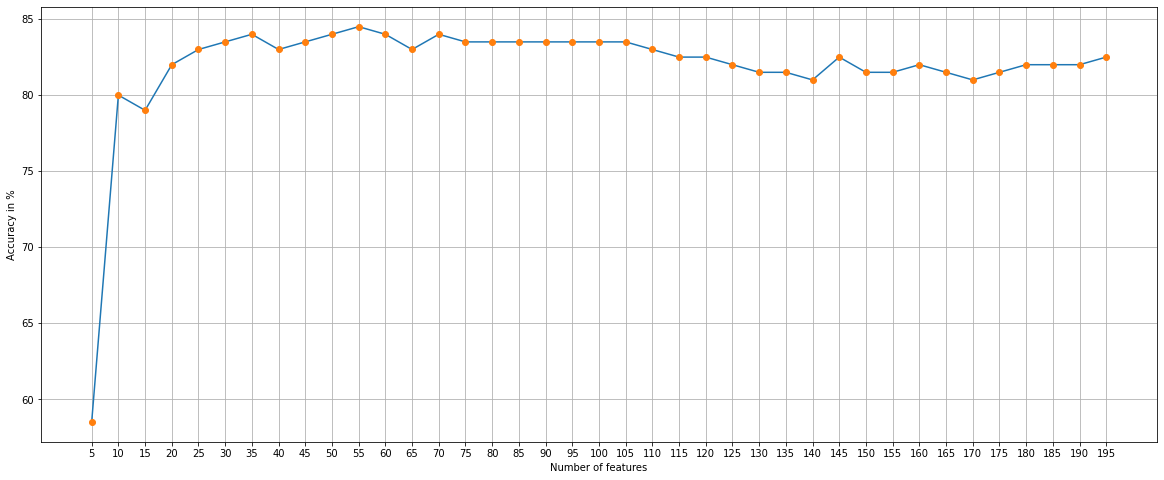

In [158]:
print(accuracies_in_static_trainlist)

fig = plt.figure(figsize=(20,8))
plt.plot(number_of_features_in_static_trainlist,accuracies_in_static_trainlist)
plt.plot(number_of_features_in_static_trainlist,accuracies_in_static_trainlist,'o')
plt.xlabel("Number of features")
plt.ylabel("Accuracy in %")
plt.xticks(number_of_features)
plt.grid()
plt.show()
        

## Use 5 sample of each person randomly for 20 times

In [143]:

number_of_features = range(5,200,5)
accuracies=[]
for number_of_feature in number_of_features:
    random_accuracies=[]
    for epoch in range(20):
        y_train = []
        y_test = []
    
        X_train = np.array([],dtype=int)
        X_test = np.array([],dtype=int)

        # reading data
        for num in range(1,41):
            trainList = np.random.choice(range(1,11), 5, replace=False)
            testList = np.setdiff1d(range(1,11),trainList)

            for index in trainList:
                image_1024 = ReadFile(num,index)
                X_train = np.concatenate((X_train,image_1024),axis=0)
                y_train.append(num)

            for index in testList:
                image_1024 = ReadFile(num,index)
                X_test = np.concatenate((X_test,image_1024),axis=0)
                y_test.append(num)

        X_train = np.reshape(X_train,(200,1024)).T
        X_test = np.reshape(X_test,(200,1024)).T


        y_train = np.array(y_train)
        y_test = np.array(y_test)
#         print("shape of X_train: ",np.shape(X_train)) #(1024,200)   

        ### Standardized
        stScaler = StandardScaler()
        standardized_X_train = stScaler.fit_transform(X_train)
        standardized_X_test = stScaler.transform(X_test)
        
#         print("variance of features: \n",np.var(standardized_data,axis=0)) # [1,...,1]

        R_x = np.cov(standardized_X_train) # (1024,1024)

        eigen_values, eigen_vectors = eigh(R_x, eigvals=(1024-number_of_feature,1023))
        transform_matris = eigen_vectors
        reduced_X_train = np.matmul(transform_matris.T,standardized_X_train).T
        reduced_X_test = np.matmul(transform_matris.T,standardized_X_test).T
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(reduced_X_train, y_train)
        y_pred = knn.predict(reduced_X_test)
        random_accuracies.append(accuracy_score(y_test, y_pred))
#         print("accuray on %d features is %.2f" % (number_of_feature ,(accuracy_score(y_test, y_pred)*100)))
    mean_of_acuracies = np.mean(random_accuracies)
    accuracies.append(mean_of_acuracies)
    print("average of accuray on %d features is %.2f" % (number_of_feature ,mean_of_acuracies))
    

number_of_features_in_random_trainlist = number_of_features
accuracies_in_random_trainlist = accuracies
   

average of accuray on 5 features is 0.71
average of accuray on 10 features is 0.85
average of accuray on 15 features is 0.87
average of accuray on 20 features is 0.91
average of accuray on 25 features is 0.92
average of accuray on 30 features is 0.91
average of accuray on 35 features is 0.91
average of accuray on 40 features is 0.91
average of accuray on 45 features is 0.90
average of accuray on 50 features is 0.91
average of accuray on 55 features is 0.91
average of accuray on 60 features is 0.91
average of accuray on 65 features is 0.91
average of accuray on 70 features is 0.91
average of accuray on 75 features is 0.92
average of accuray on 80 features is 0.92
average of accuray on 85 features is 0.91
average of accuray on 90 features is 0.91
average of accuray on 95 features is 0.91
average of accuray on 100 features is 0.91
average of accuray on 105 features is 0.91
average of accuray on 110 features is 0.91
average of accuray on 115 features is 0.91
average of accuray on 120 featu

[0.7142499999999999, 0.8510000000000002, 0.8714999999999999, 0.9059999999999999, 0.9155, 0.90725, 0.9109999999999999, 0.914, 0.9042500000000002, 0.9100000000000001, 0.9109999999999999, 0.906, 0.9065, 0.9135, 0.917, 0.91625, 0.9075000000000001, 0.906, 0.91425, 0.9062500000000002, 0.91225, 0.9052500000000002, 0.9129999999999999, 0.9122499999999999, 0.9119999999999999, 0.9147500000000001, 0.9155, 0.9147500000000001, 0.9032500000000001, 0.90575, 0.9120000000000001, 0.9075000000000001, 0.9100000000000001, 0.9157499999999998, 0.9157500000000003, 0.9085000000000001, 0.91625, 0.9122499999999999, 0.9179999999999999]


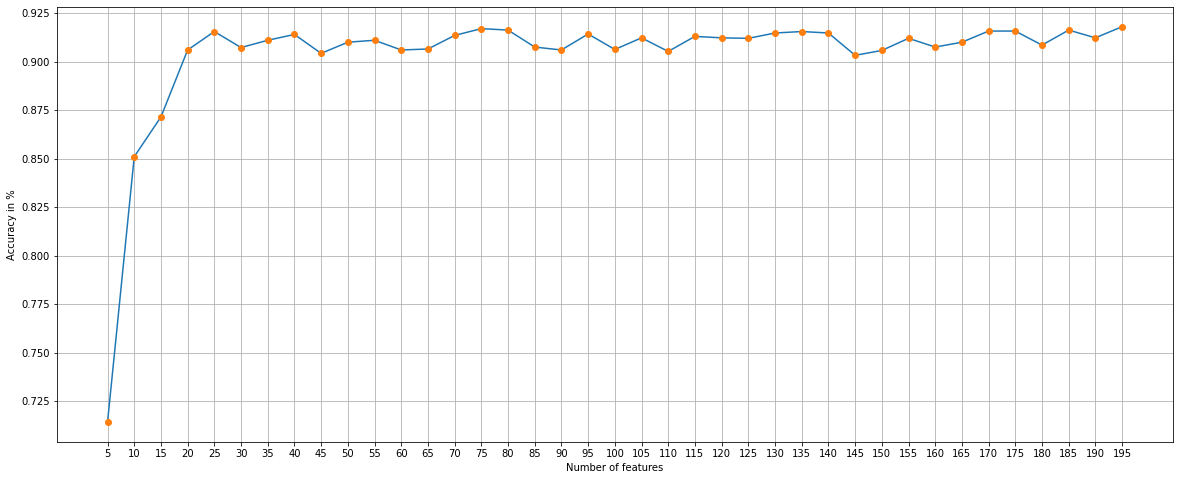

In [151]:
print(accuracies_in_random_trainlist)

fig = plt.figure(figsize=(20,8))
plt.plot(number_of_features_in_random_trainlist,accuracies_in_random_trainlist)
plt.plot(number_of_features_in_random_trainlist,accuracies_in_random_trainlist,'o')
plt.xlabel("Number of features")
plt.ylabel("Accuracy in %")
plt.xticks(number_of_features)
plt.grid()
plt.show()